In [53]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R010", "R011", "R012"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [55]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)
trials_df.loc[
    trials_df["cpoke_dur"] < 0, "cpoke_dur"
] = pd.NA  # todo- add to create trials df

[2023-08-18 20:45:24,707][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 6 sessions for R010 between 2023-08-13 and 2023-08-18
fetched 6 sessions for R011 between 2023-08-13 and 2023-08-18
fetched 6 sessions for R012 between 2023-08-13 and 2023-08-18


In [56]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R010_2023-08-18_day_summary
making R011_2023-08-18_day_summary
making R012_2023-08-18_day_summary


In [57]:
trials_df.query("date == @today").groupby(["animal_id", "date"]).give_type_imp.unique()

animal_id  date      
R010       2023-08-18    [none]
R011       2023-08-18    [none]
R012       2023-08-18    [none]
Name: give_type_imp, dtype: object

In [58]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [59]:
max = days_df.date.max()
days_df.query("date == @max")

,animal_id,date,rigid,n_done_trials,n_sessions,start_time,train_dur_hrs,trial_rate,hit_rate,viol_rate,side_bias,mass,tech,percent_target,pub_volume,rig_volume,volume_target,water_diff
13,R010,2023-08-17,Rig18,236.0,1,11:21:25,2.36,100.00,0.76,0.16,0.21,309.0,KO,0.0,0.0,8.36,9.27,-0.91
26,R011,2023-08-17,Rig19,230.0,1,11:21:25,2.36,97.46,0.72,0.17,0.18,347.0,KO,0.0,0.0,7.59,10.41,-2.82
46,R012,2023-08-17,Rig21,229.0,1,11:23:26,2.34,97.86,0.78,0.28,0.37,326.0,KO,0.0,0.0,7.15,9.78,-2.63


In [60]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R012-_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-07-29 -> 2023-08-18
Returning appended df with entries between 2023-07-29 and 2023-08-18
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R012-_days_df.csv


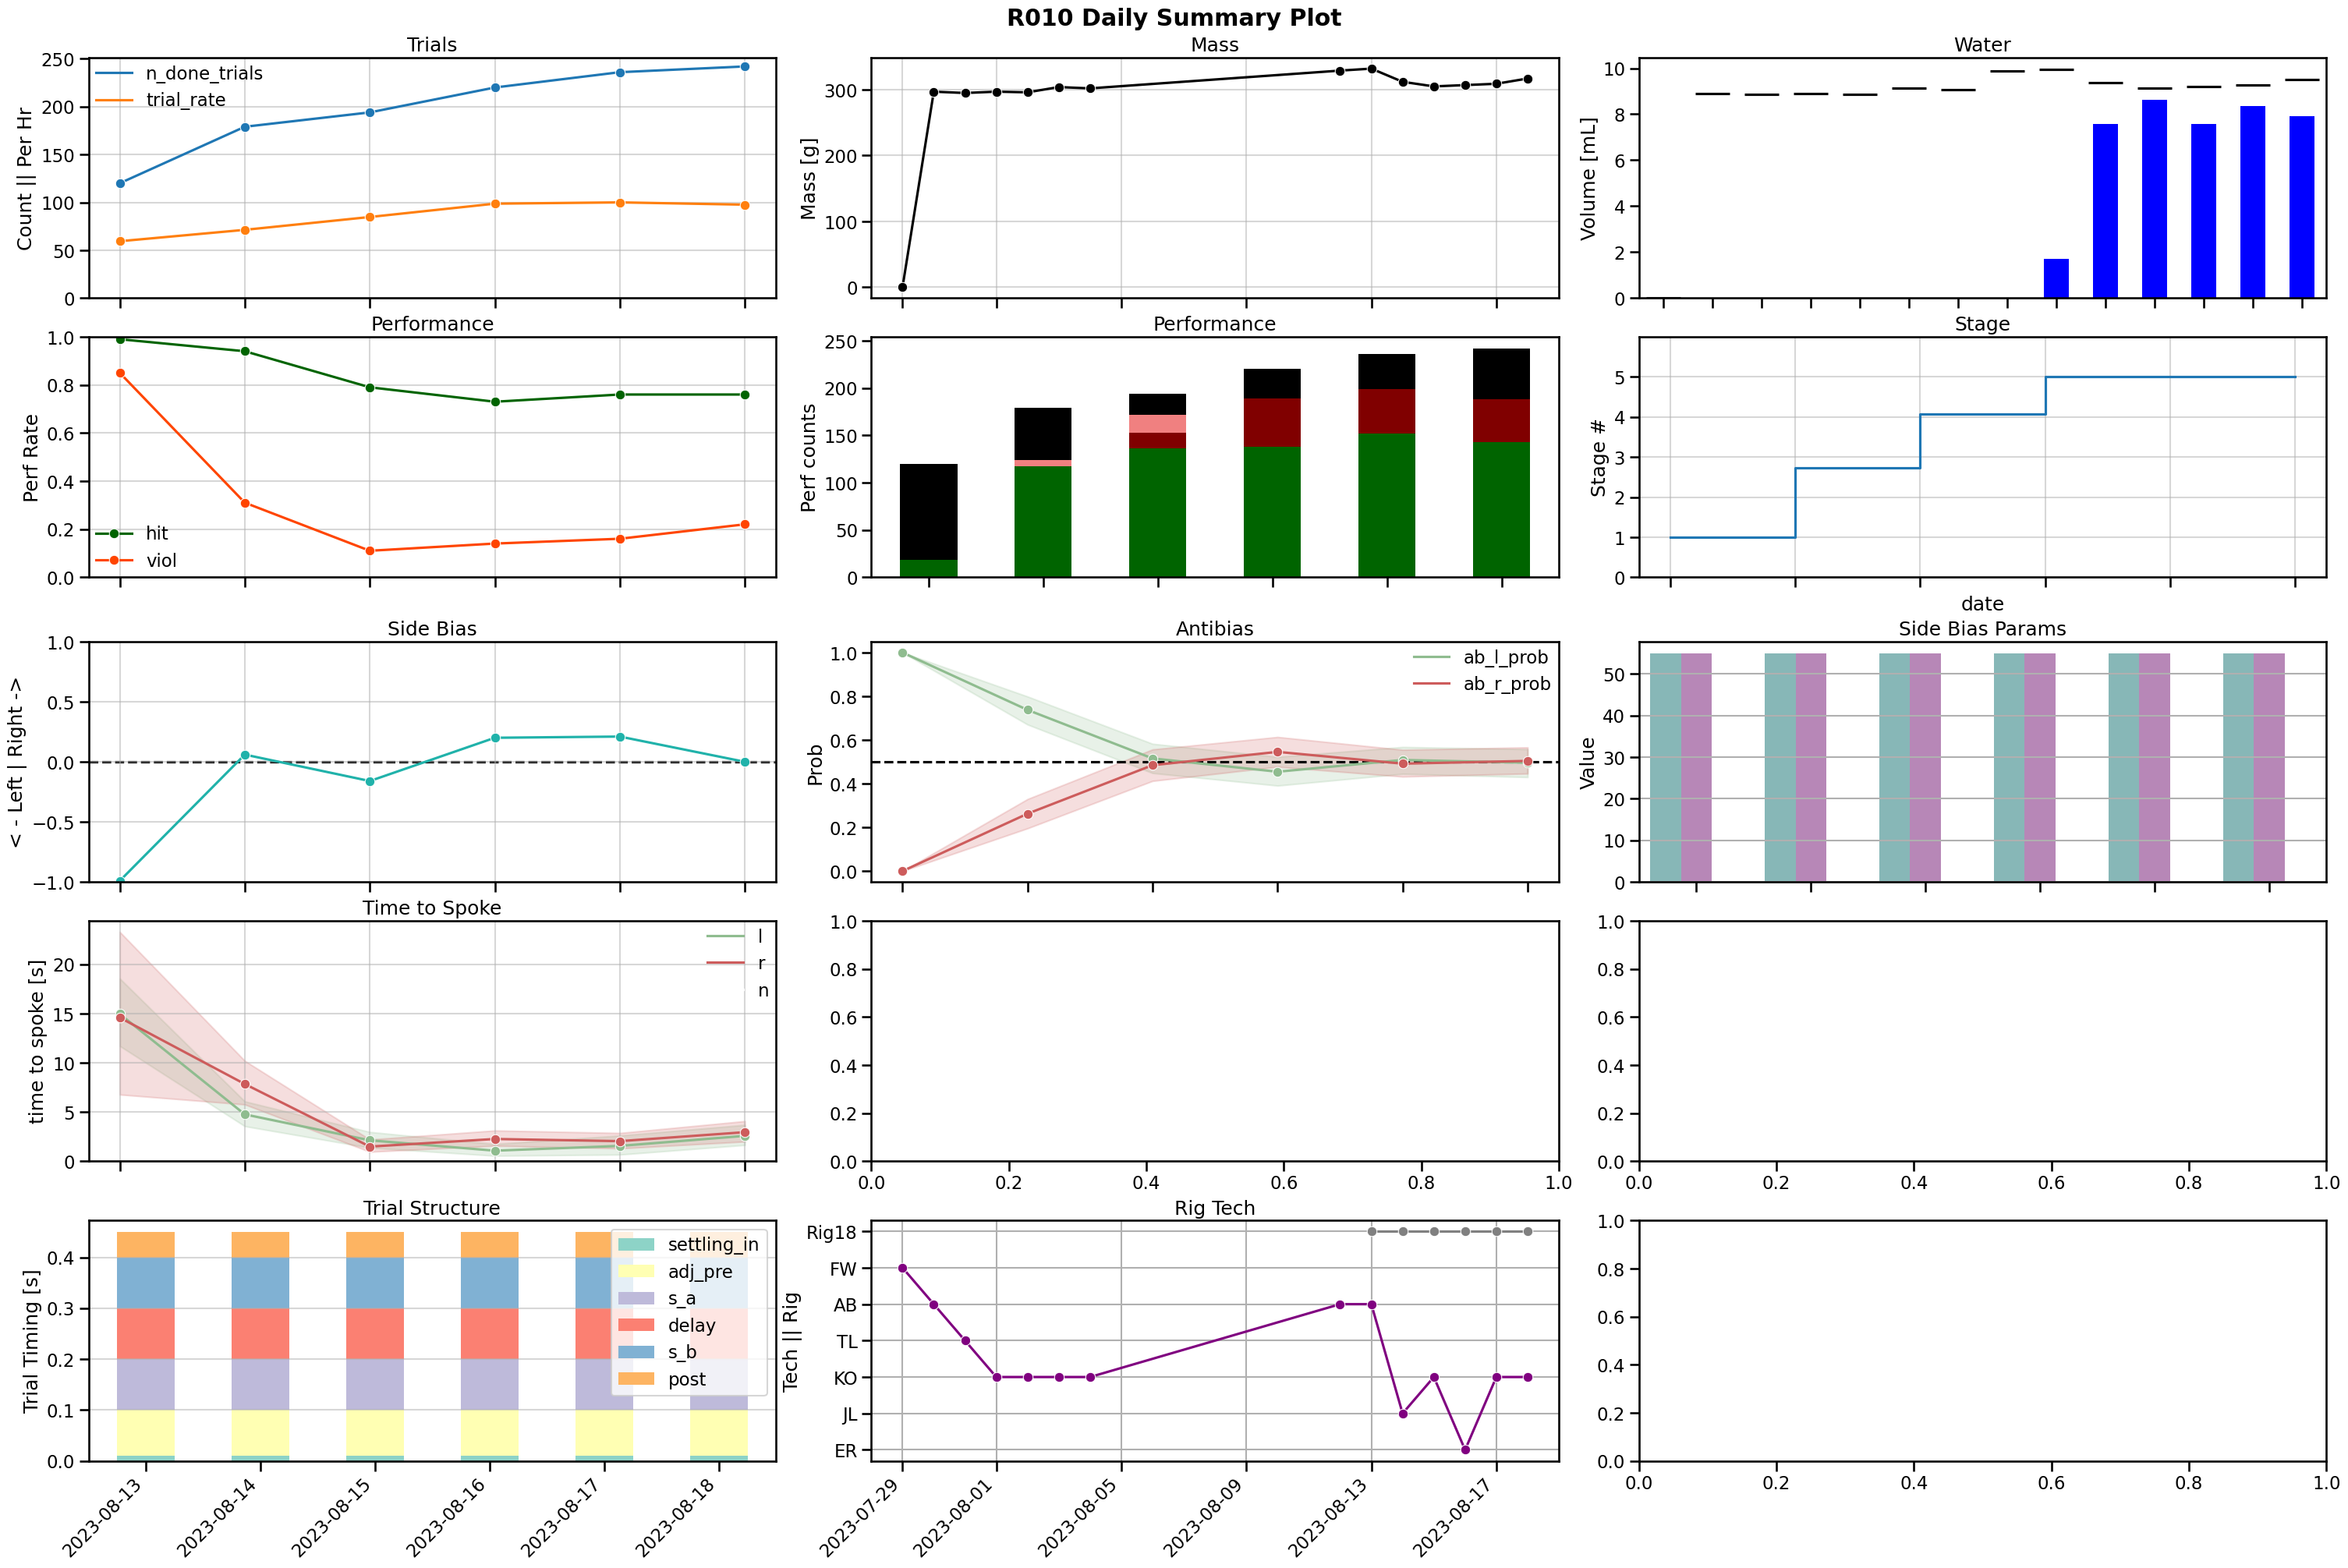

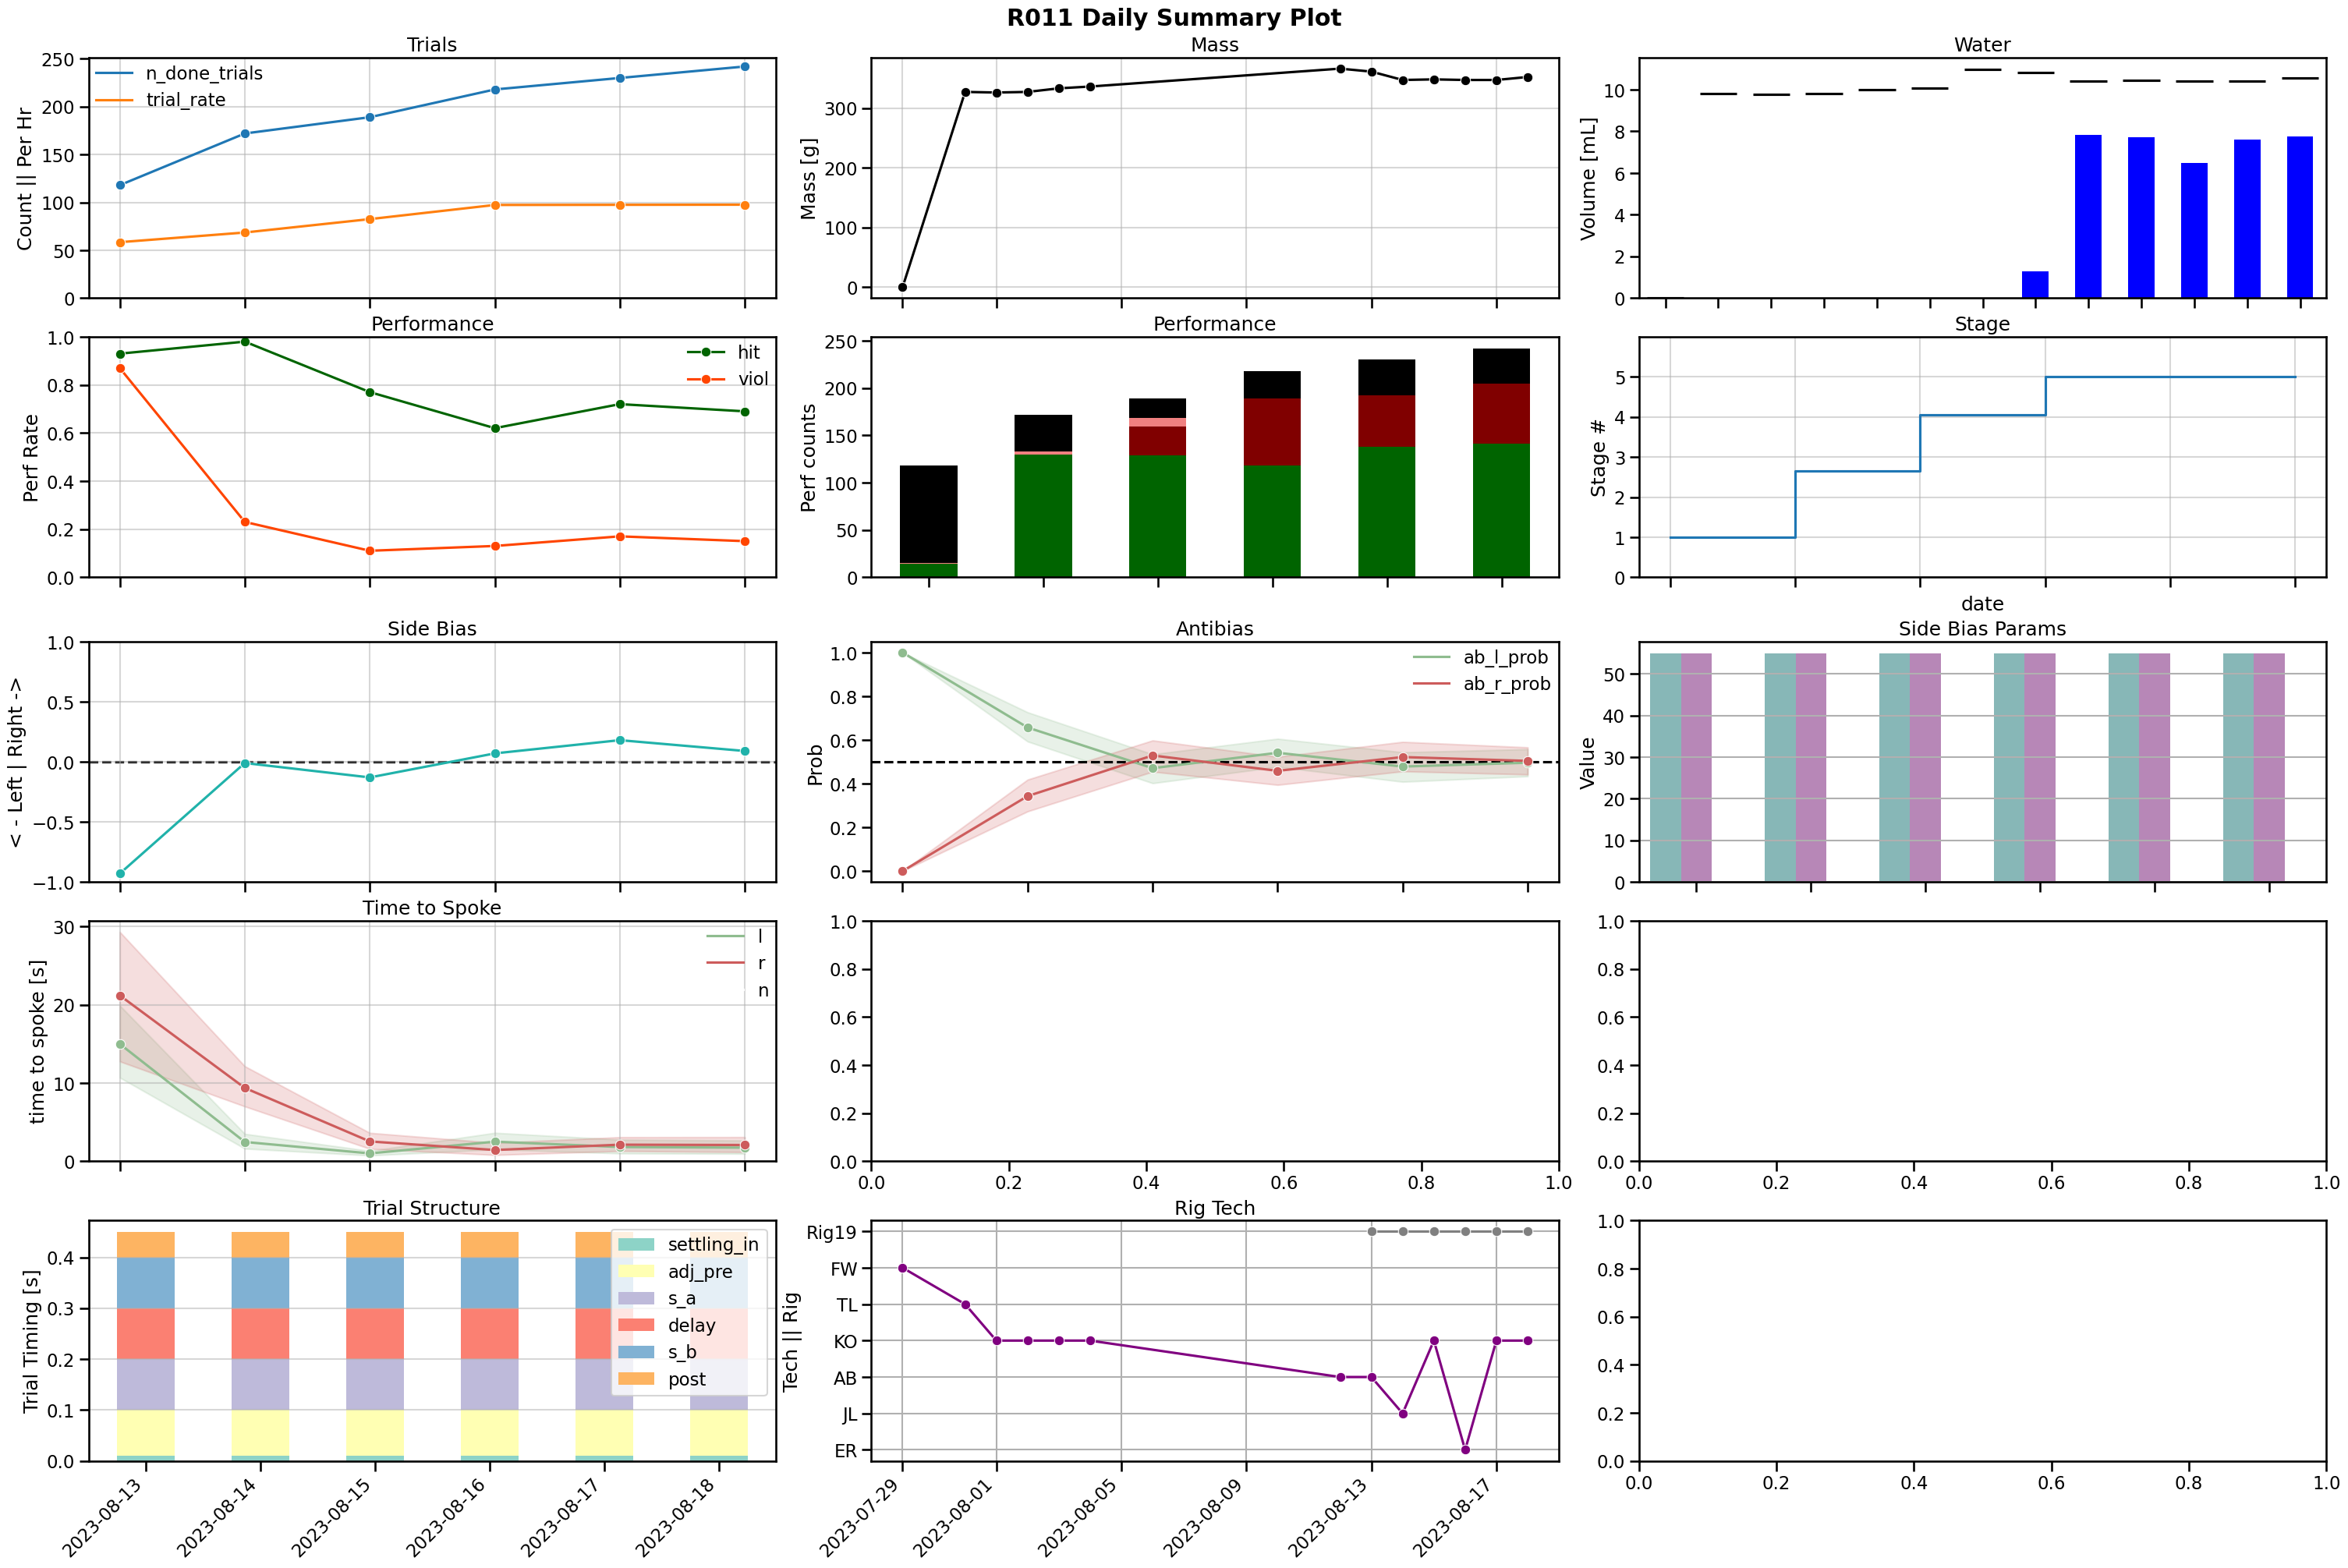

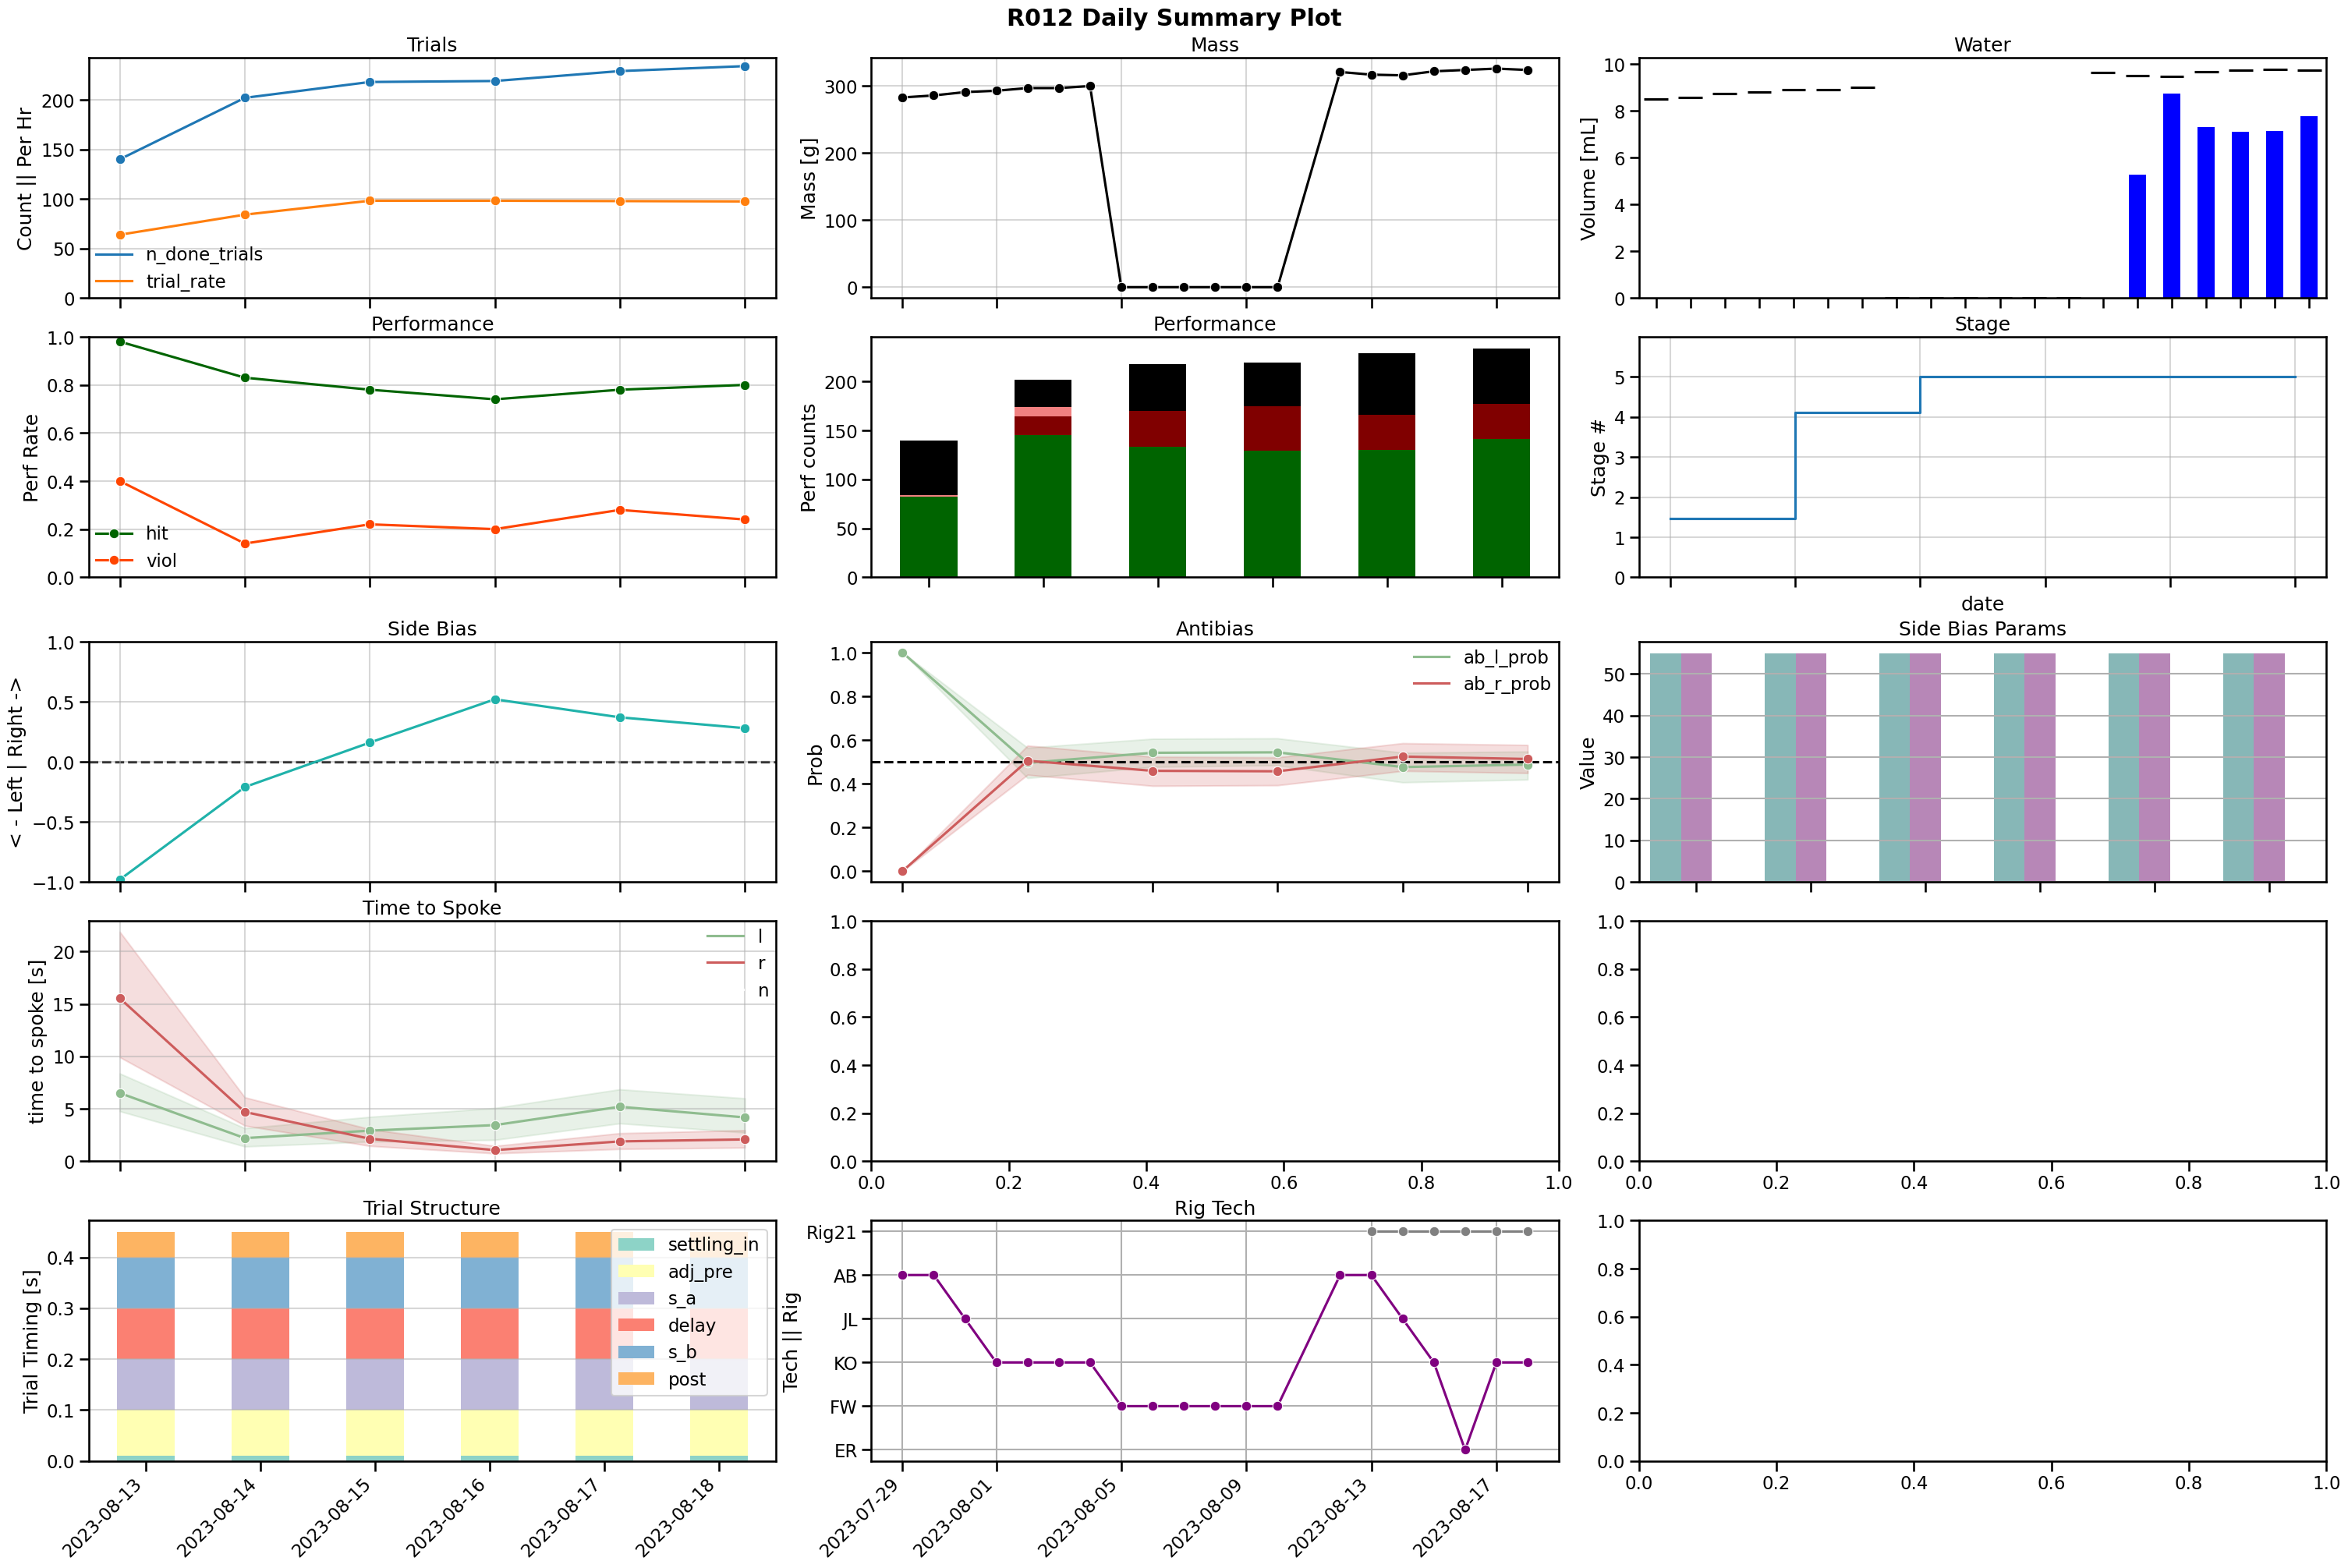

In [61]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)